## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture - Laura
2. Get the data - done
3. Explore and visualise the data to gain insights - Laura / we should use the boxplots! 
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms - Preprocessing - Kamil, make/cut different datasets
5. Explore many different models and short-list the best ones - Maks
6. Fine-tune your models - Choose like 2, max 3 models and fine tune them - Maks
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.

We are going to use supervised learning, classification. Based on basic info and personality traits we want to predict if a person is a user or a non-user. 

Explore the data and find out how many people are user for all of the drugs. If there is a drug with too little users or variance as data with low variance has no information/value. 

### Let the games begin!!!

# 1. Analysis

(//TODO Intro about how many drug's illegal status doesn't keep people from accessing, using and abusing them - featuring statements about how much more harmful uniformed drug use is as opposed to informed)

But what if we could predict what drugs each person is likely to become a user of, *before* they become a user?

To better understand the drug use trends across different age groups, we found a paper describing Substance Use Disorders across ages 18-90, illustrating differences by gender and race:

(Vasilenko S.A. et al. (2017), 'Age trends in rates of substance use disorders across ages 18–90: Differences by gender and race/ethnicity' - accessed at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5757874/)

According to this source, the age range with the most prevalent substance abuse is that of people in their twenties - for both genders, but more significantly for men. For this reason, we cross our fingers that whatever data we get our hands on has a lot of data about young people, and that maybe there are a bit more Male respondents than Female, since these are at a higher risk of substance abuse.

If we had a data set featuring respondents' personality traits and frequency of consumption for 18 legal & illegal drugs, could we then find out which drugs a person is likely to become a user of, depending on their personality?

If applied correctly, these predictions could be used to more accurately spread awareness material for drug use prevention, or, at least, safer drug use, in case it cannot be prevented - drastically (?) reducing its harm.

For this problem, we have determined that the best performance metric is **recall**. Given that we are using the model to spread awareness to people who might be at risk for Substance Use Disorder, we would much rather spread too much awareness than too little - so we will prioritize "catching" all the positives.

Since we will have information about each person's frequency of consumption for the substances, which is what we will be predicting, this model will perform **supervised learning**.

# 2. Data Acquisition & Overview

We found the dataset "Drug Consumptions (UCI)" on Kaggle, provided by the user Khadija. They got it from a paper released in 2015 called "The Five Factor Model of personality and evaulation of drug consumption risk", by E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban.

Let's break it down:

The dataset contains the following attributes:
- Age
- Gender (M or F)
- Education
- Country
- Ethnicity
- Score on different personality traits
    - Big-Five Scores (OCEAN):
        - Openness
        - Conscientiousness
        - Extraversion
        - Agreeableness
        - Neuroticism
    - Impulsiveness, measured by BIS-11
    - Sensation-Seeking, measured by ImpSS

It has, then, information about each individual's consumption of the following substances:
- Alcohol
- Amphetamines
- Amyl / Nitrite
- Benzodiazepine
- Caffeine
- Cannabis / Marijuana
- Chocolate
- Cocaine
- Crack Cocaine
- Ecstasy
- Heroin
- Ketamine
- Legal Highs
- LSD
- Methadone
- Magic Mushrooms
- Nicotine
- Semeron
    - Fictitious drug, for control, to spot overclaimers
- Volatile Substance Abuse / Inhalants
    - (for example: spray deodorantes, glue, lighter refills)

The rating for each individual's use of each substance can be one of the following:
- CL0: Never Used
- CL1: Used over a Decade Ago
- CL2: Used in the Last Decade
- CL3: Used in the Last Year
- CL4: Used in the Last Month
- CL5: Used in the Last Week
- CL6: Used in the Last Day

## Personality Traits in Data Set

Now, a few more words on each of the aforementioned personality traits, just so we get a good picture of what we're looking at, including what to expect from each trait when a person's score is low or high in it.

Knowing each of these traits well might make us better at inferring these values for someone we want to make predictions for, as well as understanding our data better.

### Openness To Experience:
This trait is characterized by active imagination, aesthetic sensitivity, attentiveness to inner feelings, preference for variety, and intellectual curiosity.
Individuals with high openness seek novelty, creativity and intellectual pursuits, whereas people who score low on this trait thrive in procedure, compliance and routine.

### Conscientiousness:
Conscientiousness relates to being dutiful, responsible and careful. Someone with a high score in this trait is likely to be very focused, thorough and self-disciplined - but, if extreme, potentially a workaholic. On the flip side, someone with a lower score could be described as laid-back, easy-going and more fun to be around. If extreme, however, a person with a very low conscientiousness may come off as careless or disorganized.

### Extraversion:
Extraversion is framed as a function of stimulation - someone who is more sensitive to outside stimuli would score lower on extraversion, tending to prefer smaller crowds, quieter environments, and more focused, cognitively-demanding activities. In contrast, someone with a high score in extraversion is less sensitive to external stimuli and, as a result, seeks more of it. They enjoy large gatherings, and come off as more energetic and lively. Extraverted people have an easier time asserting themselves and do not mind being the center of attention.

### Agreeableness:
Features of agreeableness include compassion, trust, honesty and politeness. Agreeable people are often popular, due to their inherent need for social harmony - they are more likely to "adapt to others", avoiding conflict and compromising in the favour of others. They are polite, affectionate and trusting. Conversely, people with a low Agreeableness score do not mind conflict, are better at standing their ground and do not care so much about what others think of them. For this reason, people who feel less need to be agreeable often make for excellent scientists, critics or soldiers.

### Neuroticism:
Neuroticism refers to an individual's susceptibility to stress, and a persistent tendency to be in a negative mood state. On one hand, someone with a high neurotic state experiences negative emotions such as anxiety, sadness, frustration, fear and anger more frequently than most people. This may or may not be associated with mental health concerns. On the other hand, someone with a low neurotic state is more even tempered - they go through negative emotions less often and less intensely than most people - although virtually everyone experiences them every now and then.

### Impulsiveness:
Impulsiveness is caracterized by a predisposition to rapid and unplanned decisions without adequate regard for the possible negative consequences. Impulsive individuals live under the "carpe diem" mindset, prioritizing spontaneity, whereas people with a lower impulsive score have a more strategic, planned, predictable and consistent approach to life, making them far less likely to make rash decisions or act without thinking. Less impulsive individuals keep the big picture in mind and are often more successful in social relationships and long-term goals due to their greater reliability, thoughtfulness and consistency.

### Sensation Seeking:
The Sensation Seeking trait is characterized by the need for varied, novel, complex and intense situations and experiences. An individual with a strong SS trait may feel bored if they go a long period of time without nothing thrilling to do. These people are far more likely to do things that others might consider "crazy", and this can range all the way from climbing mountains to exploring recreational drugs, depending on the individual. In contrast, people with a low score on SS find higher leves of arousal unpleasant, and steer away from intense experiences, often enjoying routine and predictableness.

Now that we know, on a high level, what is in our dataset, it's a good idea to take a closer look at each feature so that we understand the format and distribution of our data for each column.

# 3. Data Exploration

To begin with, let's import the data and print out the first few columns just to get an overview.

In [3]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

dataRaw = pd.read_csv('Drug_Consumption.csv')
dataQuantified = pd.read_csv('Drug_Consumption_Quantified.csv')
# Quantified data refers to data that has been transformed or represented in a numerical format
# suitable for analysis and modeling by machine learning algorithms.

pd.set_option('display.max_columns', None)
dataRaw.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


First observations:
- The Age is given as ranges and not specific values
- So far, the Gender is M or F. Maybe someone in the dataset didn't specify? We can take a look further on.
- Education is what you would expect.
- The Personality Trait scores look a lot like Standard Deviation values, given their observed range in these few rows. We will take a closer look later.
- The drug consumption is measured from CL0 to CL6, as specified before. This might require a transformation later.

One of the first things worth looking into is whether our data has missing values or not. In the data set description, it said there were none, but let's just see it with our own eyes.

<Axes: >

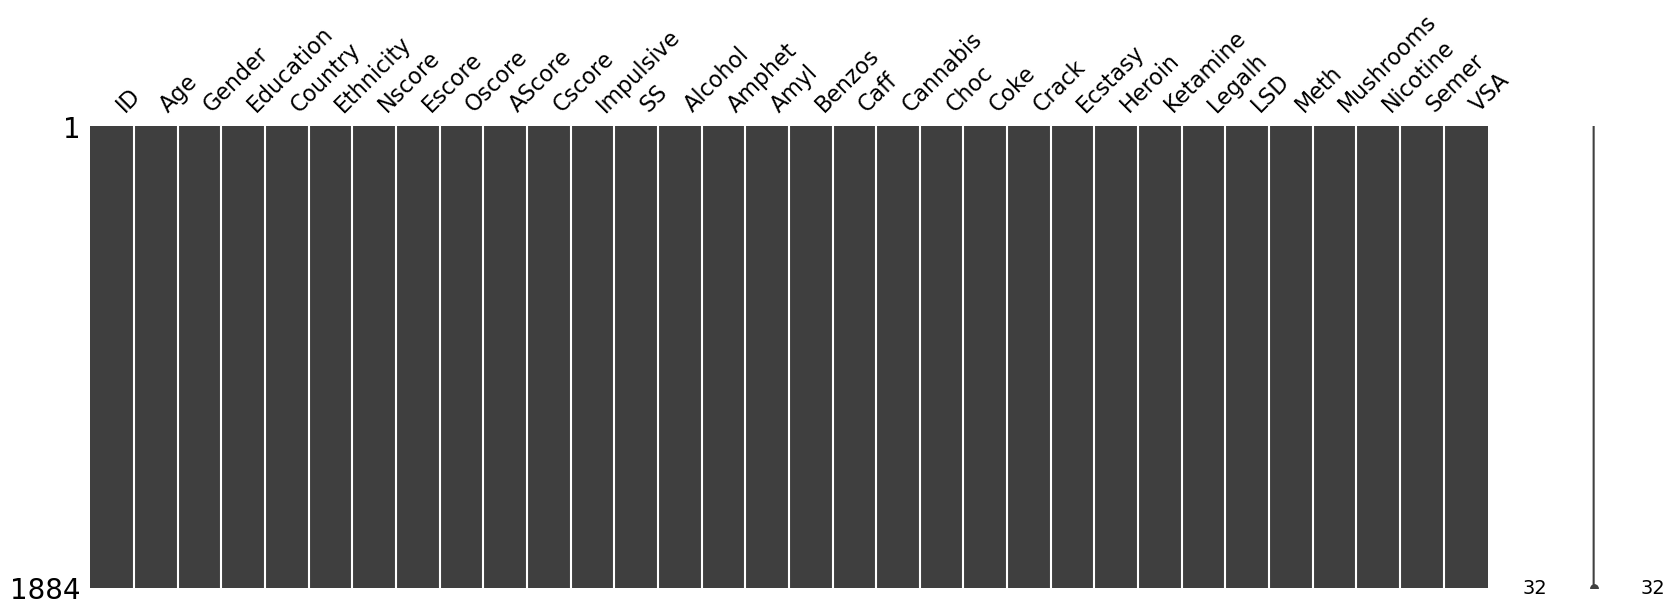

In [4]:
import missingno as mno

mno.matrix(dataRaw, figsize = (20, 6))

Nice, all filled out!

### Age
Let's see what is the distribution of Age ranges in our data.

<Axes: xlabel='Age'>

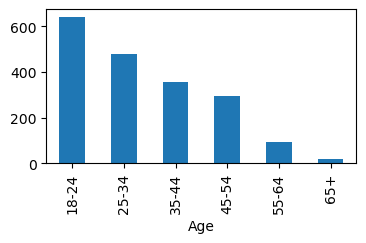

In [5]:
just_ages = dataRaw['Age']

plt.figure(figsize=(4,2))
just_ages.value_counts().plot(kind='bar')

Okay, it looks like we have a considerable amount of young people in our data set! This is good because of what was discussed in Analysis - since people in their twenties are at a higher risk of Substance Use Disorder, they are the one who have probably done the most drugs recently, so each data point will be more valuable than one that is not a regular user of many substances.

### Gender
Let's see the distribution of our data points in regards to gender, and whether or not we have a Gender value other than M or F.

<Axes: ylabel='count'>

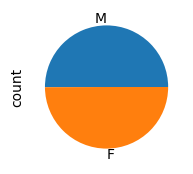

In [6]:
just_gender = dataRaw['Gender']

plt.figure(figsize=(4,2))
just_gender.value_counts().plot(kind='pie')

Oh my, that looks like a near-perfect split! And we don't have any value other than M or F, which makes things a bit simpler. This is good. We have a considerable sample size for both genders, meaning both are properly represented.

### Education
How many people do we have for each Education level? Let's see.

<Axes: ylabel='Education'>

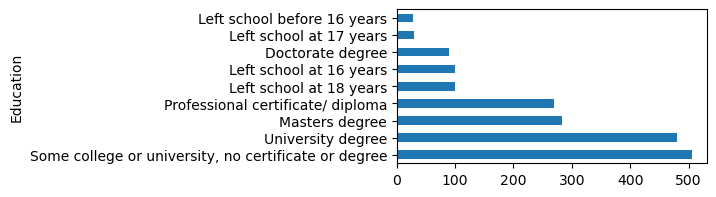

In [7]:
just_education = dataRaw['Education']

plt.figure(figsize=(4,2))
just_education.value_counts().plot(kind='barh')

Okay okay! It looks like we have a pretty diverse dataset, ranging from people who are barely educated (all of those who left school), people who are fairly educated (got a diploma, or did some college/university), and people who are very educated (finished university, got a master's degree, or even a doctorate degree).

Since some of these categories are pretty close to each other, we could consider merging some of them - for example, in the way I described above.

Either way, this diversity is good - by not having people of only one education level, our predictions can encompass a broader range of individuals.

### Country
The people in our data set - from what countries are they from? Let's see.

<Axes: ylabel='Country'>

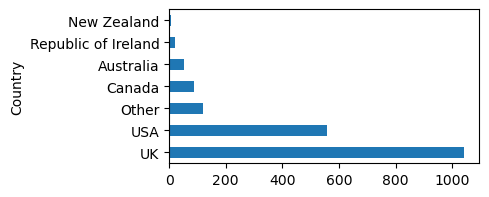

In [8]:
just_country = dataRaw['Country']

plt.figure(figsize=(4,2))
just_country.value_counts().plot(kind='barh')

It looks like we mostly have people from English-speaking countries, featuring a large majority (over half of the data set) from the United Kingdom, and a whopping one third from the USA. We also have a couple data points from the continent of Oceania. We hope that the respondents from the UK will be a good representation of European citizens' tendencies.

Our data seems to cover at least three continents - with this much diversity, we hope that our model will be able to find patterns that go beyond the person's national origin.

One thing that is worth keeping in mind is the ease of access to illicit substances across different countries. 

Given that our main countries are the UK and the USA, we did some research about the Drug Scene in these countries and found the following:

### UK Drug Scene
According to the 2019 Report of the Drug Situation in the United Kingdom, issued by the UK Government itself , the most prevalent drugs in the UK are:
- Cannabis
- (Powder) Cocaine
- MDMA
- Ketamine
- Amphetamine
- Opioids
- Benzodiazepines

Access the report here: https://www.gov.uk/government/publications/united-kingdom-drug-situation-focal-point-annual-report/uk-drug-situation-2019-summary

It is also worth noting that opioids were impled in 80% of the illicit-drug-related deaths in the UK. For this reason, this is a very high-risk type of drug for which awareness should be raised. For this reason, we will keep a closer eye on opioids during our research. The opioids we have in our data set are Heroin and Methadone.

The UK Drug Situation Report reinforced the fact that young people are especially vulnerable to substance abuse.

The report also states that the UK is one of the countries in Europe with the highest level of drug problems. In a way, this is good for us, because since UK respondents make for such a high percentage of our data, we will get very representative information - given that our chosen method of measuring performance was Recall, having the UK, a country with a lot of drug use, will probably increase our odds of finding all the actual positives. 

### USA Drug Scene
According to *the 2020 SAMSHA National Survey on Drug Abuse and Mental Health*, here's what we found about the Illicit Drug Scene in the USA in recent years:

The most prevalent addictive substances in the USA are, in order:

- Alcohol
- Nicotine
- Marijuana
- Opioids
- Inhalants
- Cocaine
- Stimulants
- Benzodiazepines

Nicotine addictions are a serious problem, particularly among young people due to the recent rise and ease of access to vaping devices.

Cannabis use in the US is very concerning among young people, with nearly a third of last-year high-schoolers reporting having used marijuana in the past year.

Just like in the UK, opioids are extremely lethal and addictive.

After these findings about the two most representative countries in our data, these are the drugs we will keep a close eye on when moving forward with our analysis and predictions:

- **Opioids**: Because of the high letality of this type of drug, allied to its widespread use.
- **Cannabis**: Because of its consistently high use across virtually all countries, which is particularly concerning among young people due to the long-term effects in brains that are far from being fully developed.
- **Nicotine**: Young people are particularly vulnerable to nicotine addicitons because the younger one is first exposed to the drug, the harder it is to let go of an addiction. If it is truly possible to predict a nicotine addiction based on personality traits, it is crucial to do so and prevent it.
- **Cocaine**: Cocaine lethalities are on the rise, and addiction remains a problem. This drug is widely used and abused, so this is something to tackle.

### Ethnicity
We have looked at the countries where our respondents live, but what about their ethnicity? Could this be a factor to consider as well when making predictions? Let's see what we're working with, and maybe do a little more research if deemed relevant.

<Axes: ylabel='Ethnicity'>

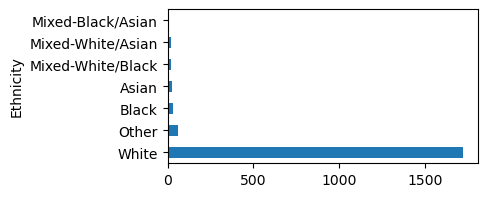

In [9]:
just_ethnicity = dataRaw['Ethnicity']

plt.figure(figsize=(4,2))
just_ethnicity.value_counts().plot(kind='barh')

It looks like there is an overwhelming majority of white respondents, so we probably won't be able to tell whether or not ethnicity is a factor in drug abuse patterns - at least, not from our data. Given the little diversity in this column, it might be worth dropping.

### Personality Traits
In the data set we took from the Internet, we saw no information about what scale the Personality Trait scores are on. So, we made a guess that they were standard deviation values - we imagined that whoever collected the data made a Personality Test for all respondents, got all their scores for each trait and transformed them into the std value they displayed in the context of the data set.

We can now test this by visualizing these columns - if they form a normal distribution curve, our guess can be deemed as correct. Let's see.

In [10]:
# I just noticed that all the Big-Five personality trait columns
# have 'score' written in lowercase except for Agreeableness,
# which has it capitalized, so I'll just correct that on the
# original DataFrame for consistency.

dataRaw.rename(columns={'AScore': 'Ascore'}, inplace='true')

array([[<Axes: title={'center': 'Oscore'}>,
        <Axes: title={'center': 'Cscore'}>,
        <Axes: title={'center': 'Escore'}>],
       [<Axes: title={'center': 'Ascore'}>,
        <Axes: title={'center': 'Nscore'}>,
        <Axes: title={'center': 'Impulsive'}>],
       [<Axes: title={'center': 'SS'}>, <Axes: >, <Axes: >]], dtype=object)

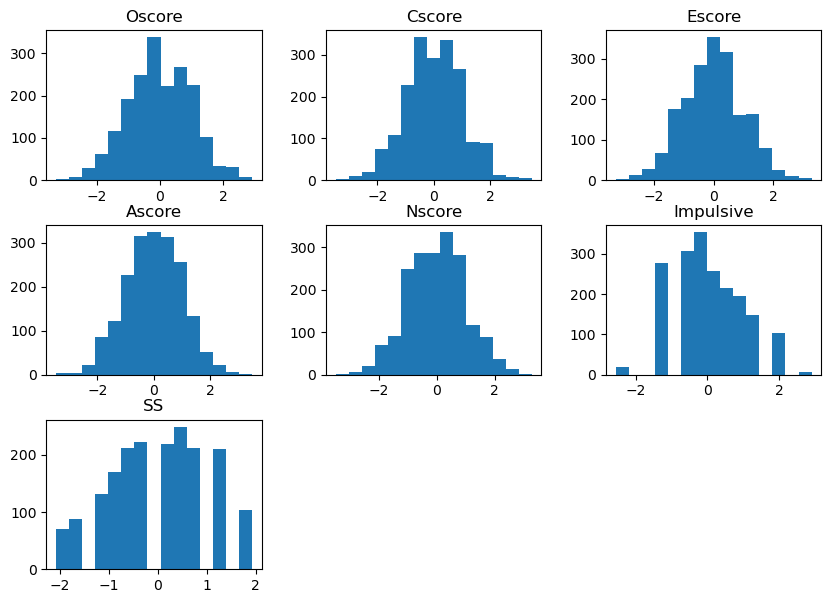

In [11]:
personality_cols = ['Oscore', 'Cscore', 'Escore', 'Ascore', 'Nscore', 'Impulsive', 'SS']
personality_only = dataRaw[personality_cols]

personality_only.hist(bins=15, figsize=(10,7), grid=False)

Interesting! The Big-Five values seem pretty normally distributed, and while the scores for Impulsiveness and Sensation Seeking still look fairly equally distributed, they look a bit odd, not to mention they have a narrower range than the other personality features. This could be because they are not part of the same Personality Analysis theory, so they are measured differently. We will take a closer look in just a moment. First, let's also use the .describe() function on this subset of features to see what we can find out.

In [12]:
personality_only.describe()

,Oscore,Cscore,Escore,Ascore,Nscore,Impulsive,SS
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,-0.000225,-0.000383,0.000143,0.000242,-0.000119,0.007335,-0.002667
std,0.996402,0.997787,0.997625,0.997481,0.998345,0.954674,0.963575
min,-3.273930,-3.464360,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.717270,-0.652530,-0.695090,-0.606330,-0.678250,-0.711260,-0.525930
50%,-0.019280,-0.006650,0.003320,-0.017290,0.042570,-0.217120,0.079870
75%,0.723300,0.584890,0.637790,0.760960,0.629670,0.529750,0.765400
max,2.901610,3.464360,3.273930,3.464360,3.273930,2.901610,1.921730


Honestly, that's kind of beautiful.
Here is some evidence that our Personality Traits data is normally distributed:

- The mean value of all features approximates to zero
- All features have approximately the same standard deviation value, even if some of their ranges differ

These are our (rounded) observed ranges for all Personality Trait subsets:
- Big-Five features: [-3.5, +3.5]
- Impulsiveness: [-2.5, +3.0]
- Sensation Seeking: [-2.0, +2.0]

DONT TAKE THIS TOO SERIOUSLY: I feel tempted to make all of them fit into a [-2.0, +2.0] range just so that they're all in the same scale. If we apply the same transformation (perhaps a simple multiplication?) to all the data points of a column, it will not affect their distribution, only their range, which is beneficial. Let's do that in part 4 - Preprocessing.

### !!! Note to Kamil: !!!
LAURA SUGGESTION (KINDA MEH, READ MAKS BELOW INSTEAD):   
I would suggest:
- Multiplying the values in all the Big-Five features by 0.571 (because it's 2.0/3.5, so if you multiply 3.5 by 0.571 it gives 2.0)
- Multiplying the values in Impulsiveness by 0.666 (so that 3.0 becomes 2.0)
- And I was wondering if, maybe, after all of those transformations, it would be wise to positively offset everything by +2? That way, the range is [0,4] for all features. Maybe this makes future transformations easier? Or do you think it's redundant and can be left between [-2,+2]? Would love to hear your thoughts. I think both are fine, but just putting it out there.

MAKS SUGGESTION (YAS):
- Maybe instead of multiplying by certain number, let's use scaling methods. maybe Min-Max scaling from (all of the values will be from -1 to 1) or Standardization (maybe even better for working with classifiers)

KAMILS ANSWERS:
- I think the scaling makes sense, I will find a scaler that fits this case. I can't quite see what is the benefit for a prediction model if the values were in range [0,4] but I might be missing something. :)


Let's try putting those on a boxplot graph.

<Axes: >

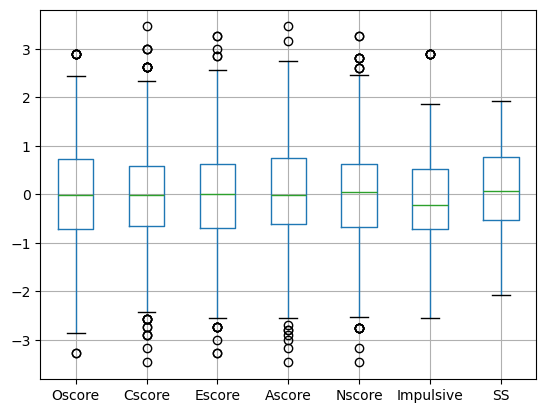

In [13]:
personality_only.boxplot()

Nice! This represents graphically what we said before that the Big Five traits are normally distributed as their mean is right in the middle and their quartiles are also a proof for that. However, we can see that there are some outliers in those traits. We decide to keep those as they are as we believe that they describe the actual situation in the world. Meaning that there are people who could and did score extremely on those metrics.  

Moving to the Impulsive and SS columns, we can see that they are not so nicely distributed but we already mentioned that. We also decide to keep the outliers in the Impulsive columns.

Could it also be interesting to see how many unique values exist in each of these columns? Let's see.

In [14]:
personality_only.nunique()

Oscore       35
Cscore       41
Escore       42
Ascore       41
Nscore       49
Impulsive    10
SS           11
dtype: int64

Well, that sure gives us a hint on why the distribution of the Impulsive and SS values looked different than the rest!

According to the printed output above, the Big-Five scores are measured a lot more continuously than the Impulsive and SS - in other words, the Big-Five contain "more boxes".

From this, we can imagine the Big-Five original scores to be, for example, all integer numbers between -20 and 20 (rounded for simplicity) and the Imp/SS scores to be something between -5 and 5.

Knowing this, let's plot Imp and SS again, but with even less "bins" to see if they look "more normal".

In [15]:
odd_cols = ['Impulsive', 'SS']

imp_and_ss = dataRaw[odd_cols]

array([[<Axes: title={'center': 'Impulsive'}>,
        <Axes: title={'center': 'SS'}>]], dtype=object)

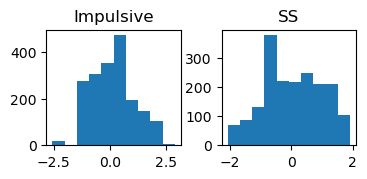

In [16]:
# 10 bins
imp_and_ss.hist(bins=10, figsize=(4,1.5), grid=False)

array([[<Axes: title={'center': 'Impulsive'}>,
        <Axes: title={'center': 'SS'}>]], dtype=object)

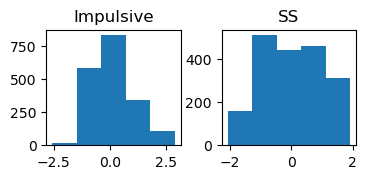

In [17]:
# 5 bins
imp_and_ss.hist(bins=5, figsize=(4,1.5), grid=False)

Okay - Impulsiveness looks pretty normally distributed when we give it the number of "bins" that its data was originally split in, but SS still stands out.

It looks like there is an unusually large amount of respondents scoring between -1.2 and -0.8. What now? Do we trust the data and assume that our respondents were just not very Sensation Seeking given the small sample size, or do we readjust it to have a normal distribution like the other features?

For now, we will leave it as it is.

<<< NOTE TO KAMIL: I tried doing a transformation to make it become Normally Distributed but my attempts failed! I tried doing +2 (so they're all positive) and then square it, but the resulting curve wasn't any better... If you can do it, I think it would be nice. But if you can't, I think it's also okay to leave it as it is because it's not that bad. Let me know :D >>>

Note to Laura: I will consider that yeah.

Having observed all of this, we conclude that the Personality Trait scores follow a normal distribution, and can move on with our analysis.

### Substances
Substances, substances... There are so many questions that can be asked with the information that we have. Let's break them down:

- Given that our desired label is "user" or "non-user" (as opposed to CL0-CL6 like we have now), when is it a good idea to transform our data into our desired label format?

(Let's first see the frequency tendencies we see with each substance and then go from there.)

- What drugs do people consume on a daily-basis?
- What drugs do people consume on a weekly-basis?
- What drugs have our respondents only consumed in the past year?
- And in the past decade?
- And in over a decade?
- How many people have never tried each drug?

(Now would be a good time to transform CL0-CL6 to user/non-user.)

- What drugs have the most and the least users?
- Are there any drugs in our data set that are so rare that they are not even worth adding to our predictions?

Maybe more questions will pop up as we visualize the data. Let's see.

In [18]:
drugs_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

drugs_only = dataRaw[drugs_cols]

In [19]:
# Define a function that prints out a certain substance's frequency

# Function that calculates the number of people that have consumed
# a certain drug for a certain given frequency. 
# (fx. 'Alcohol', 'CL6' would output how many people consumed
# alcohol in the past day (before the survey).)
def calc_and_print_frequency(colname, freq):
    try:
        count = drugs_only[colname].value_counts()[freq]
    except:
        count = 0
    pct = round(count / 1884 * 100, 2)
    print_freq(colname,freq,count,pct)

# Support function for the function above, just to give the
# string output and print it in a readable manner.
def print_freq(colname, freq, count, pct):
    print(colname + " " + cl_to_words(freq) + str(count) + " \t(" + str(pct) + "%)")

# Function that calculates the number & percentage of people
# that have consumed a certain drug for a certain given frequency.
# The "main" frequency is the first given in the array.
# If you give more than one frequency, this function
# will calculate, cumulatively, how many people have used this drug.
# For example: If you pass, as an argument:
    # the data set (obviously)
    # and freq = ['CL5', 'CL6']
    # Then the "main frequency" is CL5 (past week), so you'll
    # get the number of people who have only taken the drug
    # in the past week, but you will also get the CUMULATIVE
    # value, a.k.a. all the people with CL5 OR CL6 for this drug.
    # Because this sums how many did it in the past week but also
    # in the past day.
    # This is why there are columns "NumOfPeople"/"PctOfPeople"
    # (for the main frequency) - in our example, "past week"
    # and columns "NumOfPeopleCum/PctOfPeopleCum"
    # (for the cumulative frequency) - in our example, "past week" + "past day"


# //TODO FIX THIS! its messing up Semeron edge case!
def make_cumulative_frequency_df(data, freq):
    pct_by_freq = pd.DataFrame({'Substance': [],
                                'NumOfPeople': [],
                                'NumOfPeopleCum': [],
                                'PctOfPeople': [],
                                'PctOfPeopleCum': []})
    i = 0
    for col in drugs_cols:
        try:
            count = 0
            cumCount = 0
            j = 0
            for f in freq:
                if (j == 0):
                    count = count + data[col].value_counts()[f]
                cumCount = cumCount + data[col].value_counts()[f]
                j = j+1

        except:
            count = 0
        pct = round(count / 1884 * 100, 2)
        pctCum = round(cumCount / 1884 * 100, 2)
        obj = {'Substance': col,
               'NumOfPeople': count,
               'NumOfPeopleCum': cumCount,
               'PctOfPeople': pct,
               'PctOfPeopleCum': pctCum}
        pct_by_freq.loc[i] = obj
        i = i + 1

    pct_by_freq.sort_values('PctOfPeople', ascending=False, inplace=True)
    pct_by_freq.set_index('Substance', inplace=True)
    return pct_by_freq

# Kind of dictionary function just to make the
# CL ratings readable to a human:)
def cl_to_words(cl):
    switcher = {
        'CL0': "Never Attempted: ",
        'CL1': "Used Over a Decade Ago: ",
        'CL2': "Used In Last Decade: ",
        'CL3': "Used in Last Year: ",
        'CL4': "Used in Last Month: ",
        'CL5': "Used in Last Week: ",
        'CL6': "Used in Last Day: "
    }
    return switcher.get(cl)

### What substances have these people consumed the **DAY** before the survey?

<Axes: ylabel='Substance'>

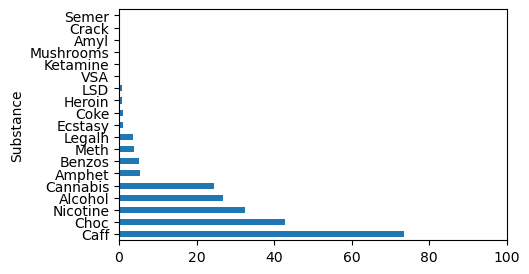

In [20]:
daily = make_cumulative_frequency_df(drugs_only, ['CL6'])

daily_pct = daily['PctOfPeople']

daily_pct.plot.barh(figsize=(5,3), xlim=[0,100])

In [21]:
daily[['NumOfPeople', 'PctOfPeople']]

,NumOfPeople,PctOfPeople
Substance,,
Caff,1384,73.46
Choc,807,42.83
Nicotine,610,32.38
Alcohol,505,26.80
Cannabis,463,24.58
Amphet,102,5.41
Benzos,95,5.04
Meth,73,3.87
Legalh,67,3.56


Very interesting numbers! Observations:

***In the 24 hours before the survey:*** 

*Significant consumption:*   

- Three fourths **(75%)** of the people drank **coffee**.
- **42%** of the people ate **chocolate**.
- A third **(32%)** of the people consumed **nicotine**.
- A fourth **(25%)** of the people drank **alcohol**.
- Also, a fourth **(25%)** of the people smoked **cannabis**.


The most consumed substances on a daily basis are the legal ones, except for cannabis, which, despite being illegal in many places, still scored very high.

***Noticeable consumption:***  

- Amphetamines (102 people, 5%)
- Benzodiazepines (95 people, 5%)
- Legal Highs (67 people, 3%)
- Methadone (73 people, 4%)

This was interesting to notice. Apart from legal highs, the second "level" of drugs that are being consumed on the daily basis are those that, despite being illegal recreationally, can be prescribed medically (amphetamines for ADHD, benzodiazepines for anxiety/insomnia, and methadone for pain relief and Opioid Use Disorder). Unfortunately, we have no data on how each respondent acquired each drug they have consumed, but we can assume with fair confidence that the trend for these drugs to be higher on the list is that they are being acquired in a medical context.

***Low consumption:***  

- Ecstasy (21 people, 1.11%)
- Coke (19 people, 1.01%)
- LSD (13 people, 0.69%)
- Ketamine (13 people, 0.69%)
- Volatile Substances (7 people, 0.37%)
- Mushrooms (4 people, 0.21%)
- Amyl Nitrite (3 people, 0.16%)
- Heroin (3 people, 0.16%)
- Crack (2 people, 0.11%)

Although some of these substances are a bit hardcore, there was always at least someone who had used them in the past day. That's wild, but it means we got a good group of respondents. (Because the ideal group of respondents would range from super sober people to people who are straight up unhinged.)

***No consumption at all:***

- Semer (0 people)

It's very appropriate that no one answered that they had done Semer in the past day - since this drug is fictional. It would have been hilarious if someone had claimed that, but no. Maybe with a bigger sample size. Anyway. :)

### What substances have these people consumed the **WEEK** before the survey?

When moving on from Day to Week, there is a question we must pose - will we look at the percentage of people who have cumulatively consumed it in the past week (past week + past day), or will we look at people who have used in the past week, but not in the past day?

Both of these ways of looking at the data are interesting, so we modified our people-counting function to accomodate for this. In the following graphs, we will see two bars:

- One for only the given frequency (in this case, 'CL5')
- One for the cumulative frequency (in this case, 'CL5' + 'CL6').

<Axes: ylabel='Substance'>

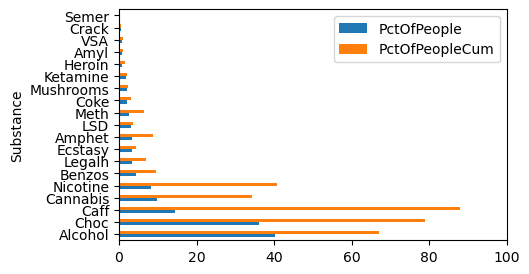

In [22]:
weekly = make_cumulative_frequency_df(drugs_only, ['CL5', 'CL6'])

weekly_pct = weekly[['PctOfPeople', 'PctOfPeopleCum']]

weekly_pct.plot.barh(figsize=(5,3), xlim=[0,100])

In [23]:
weekly

,NumOfPeople,NumOfPeopleCum,PctOfPeople,PctOfPeopleCum
Substance,,,,
Alcohol,758,1263,40.23,67.04
Choc,682,1489,36.20,79.03
Caff,273,1657,14.49,87.95
Cannabis,185,648,9.82,34.39
Nicotine,157,767,8.33,40.71
Benzos,84,179,4.46,9.50
Legalh,64,131,3.40,6.95
Ecstasy,63,84,3.34,4.46
Amphet,61,163,3.24,8.65


Observations:
- Alcohol climbed to the top of the weekly table. We can infer from this that perhaps people are not consuming it on a daily basis, but rather on a weekly occasion - probably the weekend.
- Chocolate stayed strong at second place - it seems that a large chunk of our respondents have a sweet tooth and cannot resist this treat for longer than a week.
- Caffeine went down by two places, but cumulatively, the percentage of people who have consumed it either in the past day or week becomes (74 + 15 = 89%), making it, by far, the most regularly consumed substance.
- Cannabis cumulative consumption in the past week got bumped up to 34% - could it be that a third of our respondents get high regularly?
- The rest of the drugs got bumped up by just a little bit - between 84 (for Benzodiazepine) and 9 for Crack Cocaine.
    - It looks like 1 out of 10 of our respondents are taking Benzodiazepine on a weekly basis.
- Still, no one has claimed to have used Semeron in the past week. We are curious as to when someone will start making that claim.

### What substances have these people consumed the **MONTH** before the survey?

<Axes: ylabel='Substance'>

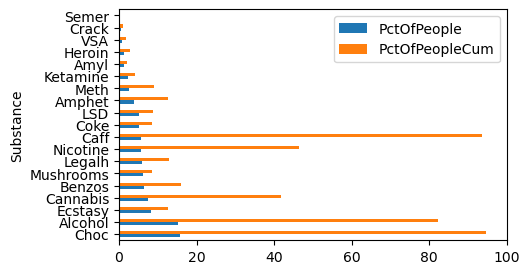

In [24]:
monthly = make_cumulative_frequency_df(drugs_only, ['CL4', 'CL5', 'CL6'])

monthly_pct = monthly[['PctOfPeople', 'PctOfPeopleCum']]

monthly_pct.plot.barh(figsize=(5,3), xlim=[0,100])

In [25]:
monthly

,NumOfPeople,NumOfPeopleCum,PctOfPeople,PctOfPeopleCum
Substance,,,,
Choc,296,1785,15.71,94.75
Alcohol,287,1550,15.23,82.27
Ecstasy,156,240,8.28,12.74
Cannabis,140,788,7.43,41.83
Benzos,120,299,6.37,15.87
Mushrooms,115,159,6.10,8.44
Legalh,110,241,5.84,12.79
Nicotine,108,875,5.73,46.44
Caff,106,1763,5.63,93.58


How interesting!!! Here are our findings so far:

***Substances that almost everyone is consuming:***
- Chocolate (95%)
    - 16% of people can keep it down to a few times a month
    - But ultimately, as much as 95% of our respondents have eaten chocolate in the past month!!
- Caffeine (93%)
    - Only 6% out of 93% drank coffee in the past month but not in the past week/day. This substance remains the most regularly consumed.
- Alcohol (82%)
    - 15% of people can keep it down to a few times a month
    - But 82% of our respondents have drank in the past month - that's 4 out of 5 people! Everyone is drinking!

***Substances that people are taking not so much on a weekly basis, but rather monthly:***
- Ecstasy
- Mushrooms
- Coke
- LSD  

(By this, we mean the substances that got a significant bump (the percentage doubled or more, nearing 10%) from the CL4 (past month) score).

So far, the substances we must keep an eye on are:

- **Widely used drugs (> 40%)**
    - Alcohol (1550 people, 82%)
    - Nicotine (855 people, 46%)
    - Cannabis (788 people, 42%)

Caffeine and Chocolate don't pose as much risk to Substance Use Disorder so they do not make the list.

- **Prescription drugs & legal highs (9-16%)**
    - Benzodiazepines  (299 people, 16%)
    - Legal Highs (241 people, 13%)
    - Amphetamines (238 people, 13%)
    - Methadone (171 people, 9%)

- **Party / psychedelic drugs (8-13%)**
    - Ecstasy (240 people, 13%)
    - LSD (166 people, 9%)
    - Mushrooms (159 people, 8%)
    - Coke (159 people, 8%)

These substances are being used fairly regularly on a monthly basis by our respondents so we have plenty of data on them. From our list, here is a harm assessment for the drugs that made it to our "watchlist", in order of risk:

- Alcohol
    - Direct effects: Cancer, liver damage, hypertension, heart disease, and fetal damage
    - Behavioral effects: alcohol abuse increases the risk of suicide, violence, and motor accidents
    - Combined with how widespread and socially accepted its use is, alcohol is deemed as a fairly dangerous substance.
- Methadone
    - Risk of overdose
    - Dangerous to combine with other substances (fx Benzodiazepines)
- Coke
    - Heart disease, hypertension, organ failure, respiratory distress, stroke, unhealthy weight loss, and seizures
    - Overdose deaths are common
- Benzodiazepines
    - Risk due to widespread availability
    - Sleeping problems, hallucinations, anxiety, and life-threatening seizures
    - Combining with other subsdtances increases the risk of a fatal overdose
- Nicotine
    - Extremely addictive
    - Tobacco in particular: harms nearly every organ in the body, can lead to premature death, and can increase the risk of stroke.
- Ecstasy
    - Often "cut" with other substances, which increases risk of overdosing substantially
    - Increase of heart rate, sharp rise in body temperature, kidney failure, death
    - Continued use can lead to psychological or physical dependence
- Amphetamines
    - Long-term use can damage the brain and the cardiovascular system and may lead to psychosis, malnutrition and erratic behaviour

Cannabis, LSD and Mushrooms are recreational drugs with a significantly lower risk than the substances aforementioned. Their toll on the body is far lower and their risk of physical addiction is near zero. That is not to say that the risk is non-existent - people have also gotten *psychologically* addicted to these substances, and cannabis, when consumed by young people, can produce effects such as cognitive deficiencies on a developing brain. Still, they are far less likely to be life-threatening. If used with caution, the risk of these substances drops even lower.

//TODO (!!! ADD SOURCE !!!)

(Sources: 
- https://www.addictioncenter.com/news/2019/08/15-most-dangerous-drugs/
- https://www.betterhealth.vic.gov.au/health/healthyliving/amphetamines)


### What substances have these people consumed the **YEAR** before the survey?

<Axes: ylabel='Substance'>

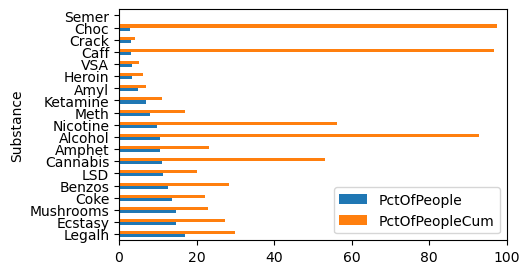

In [26]:
yearly = make_cumulative_frequency_df(drugs_only, ['CL3', 'CL4', 'CL5', 'CL6'])

yearly_pct = yearly[['PctOfPeople', 'PctOfPeopleCum']]

yearly_pct.plot.barh(figsize=(5,3), xlim=[0,100])

In [27]:
yearly

,NumOfPeople,NumOfPeopleCum,PctOfPeople,PctOfPeopleCum
Substance,,,,
Legalh,323,564,17.14,29.94
Ecstasy,277,517,14.70,27.44
Mushrooms,275,434,14.60,23.04
Coke,258,417,13.69,22.13
Benzos,236,535,12.53,28.40
LSD,214,380,11.36,20.17
Cannabis,211,999,11.20,53.03
Amphet,198,436,10.51,23.14
Alcohol,198,1748,10.51,92.78


What a significant bump for a lot of substances! Let's see:

A lot of people have not done these drugs in the past month, but have consumed them at least once in the past year:

(The list of substances below reflects those whose cumulative consumption more than doubled after considering the consumption in the past year. For example, if a substance went from 7% to 15% consumption, it makes the cut, but if it went from 30% to 40%, it would not make it.)

(The value between parenthesis is the cumulative % of people who have consumed this drug in year before the survey.)

- Legal Highs (30%)
- Ecstasy (27%)
- Mushrooms (23%)
- Coke (22%)
- LSD (20%)
- Ketamine (11%)
- Amyl Nitrite (7%)
- Heroin (6%)
- Volatile Substances (5%)

Here, we see a couple of "new faces", such as Ketamine, Amyl Nitrite, Heroin and Volatile Substances. These drugs are of a considerably high risk, particularly Heroin (//TODO ADD SOURCE), so it's good that people are not doing them so often.

When we are done with analysing how many datapoints we have for each of these substances, we will weigh the amount of data we have versus the risk level of each drug, to determine if there is any substance that we will exclude from our model's predictions due to lack of sufficient data.

### What substances have these people consumed the **DECADE** before the survey?

<Axes: ylabel='Substance'>

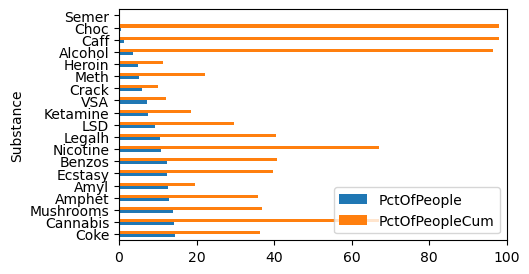

In [28]:
decade = make_cumulative_frequency_df(drugs_only, ['CL2', 'CL3', 'CL4', 'CL5', 'CL6'])

decade_pct = decade[['PctOfPeople', 'PctOfPeopleCum']]

decade_pct.plot.barh(figsize=(5,3), xlim=[0,100])

In [29]:
decade

,NumOfPeople,NumOfPeopleCum,PctOfPeople,PctOfPeopleCum
Substance,,,,
Coke,270,687,14.33,36.46
Cannabis,266,1265,14.12,67.14
Mushrooms,260,694,13.80,36.84
Amphet,242,678,12.85,35.99
Amyl,237,370,12.58,19.64
Ecstasy,234,751,12.42,39.86
Benzos,233,768,12.37,40.76
Nicotine,203,1263,10.77,67.04
Legalh,198,762,10.51,40.45


How interesting! For more than half of the drugs, 10% of the people have not used them in the past year, but did in the past decade.

There are many ways in which we can interpret this, but for our analysis, we will say that someone who has done a drug in the past decade but not in the past year is not a user - a decade is a really long time. Imagine having tried Cocaine once at 18 and still being considered a user at 27? That doesn't sound right to us. Besides, trying a drug once isn't enough to be considered a user.

We still have no one who has claimed to have tried Semeron.

### What substances have these people consumed **OVER A DECADE AGO** before the survey?

<Axes: ylabel='Substance'>

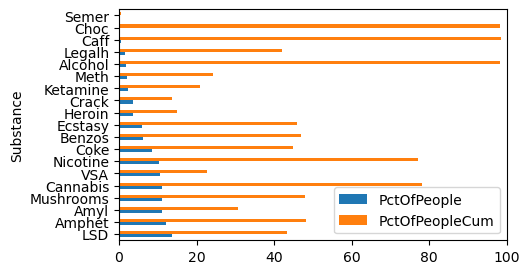

In [30]:
over_decade = make_cumulative_frequency_df(drugs_only, ['CL1','CL2', 'CL3', 'CL4', 'CL5', 'CL6'])

over_decade_pct = over_decade[['PctOfPeople', 'PctOfPeopleCum']]

over_decade_pct.plot.barh(figsize=(5,3), xlim=[0,100])

The same we said for the past decade applies here. Sure, a lot of people have tried Cocaine a long time ago, but that doesn't make them a user.

We must note that the substances that got the most significant cumulative increase from this "time slot" were Amyl Nitrite, Volatile Substances and Crack Cocaine - but since people haven't done them in a really long time, we don't deem it as a risk anymore.

### What substances have these people **NEVER** consumed... before the survey?

<Axes: ylabel='Substance'>

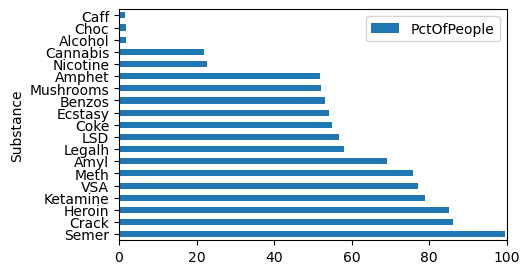

In [31]:
never = make_cumulative_frequency_df(drugs_only, ['CL0'])

never_pct = never[['PctOfPeople']]

never_pct.plot.barh(figsize=(5,3), xlim=[0,100])

In [32]:
never

,NumOfPeople,NumOfPeopleCum,PctOfPeople,PctOfPeopleCum
Substance,,,,
Semer,1876,1876,99.58,99.58
Crack,1626,1626,86.31,86.31
Heroin,1604,1604,85.14,85.14
Ketamine,1489,1489,79.03,79.03
VSA,1454,1454,77.18,77.18
Meth,1428,1428,75.80,75.80
Amyl,1304,1304,69.21,69.21
Legalh,1093,1093,58.01,58.01
LSD,1068,1068,56.69,56.69


Yay, how interesting! Looking particularly at the graph, we can almost cluster the drugs into different categories based on how many people have never tried them before!

- Widespread Use:
    - Chocolate
    - Caffeine
    - Alcohol
- Common Use (4 out of 5 have tried):
    - Nicotine
    - Cannabis
- Half have tried:
    - Amphetamines
    - Mushrooms
    - Benzodiazepines
    - Ecstasy
    - Coke
    - LSD
- Most people haven't tried:
    - Amyl Nitrite
    - Methadone
    - Volatile Substances
    - Ketamine
    - Heroine
    - Crack Cocaine
- Fictitious - no one has tried :
    - Semeron

### Users VS Non-Users

Yay, we've analysed the frequency with which each substance has been used by our respondents! Now, we just want to see the amount of users for each substance. Since "user/non-user" will be our label, seeing how many data points we have for this particular way of looking at the data will help us see if there is anything we should discard.

As mentioned before, we will only consider someone the user of a drug if they have used it in the past year. That means:

- CL6 (Past Day) - CL3 (Past Year): User (1)
- CL2 (Past Decade) - CL0 (Never): Non-User (0)

We will represent User as the integer 1 and Non-User as the integer 0.

In [33]:
user_vals = ['CL6', 'CL5', 'CL4', 'CL3']
non_user_vals = ['CL2', 'CL1', 'CL0']

user_non_user = dataRaw

def transform_df(df):
    for drug in drugs_cols:
        for cat in user_vals:
            df.loc[user_non_user[drug] == cat, drug] = '1'
        for cat in non_user_vals:
            df.loc[user_non_user[drug] == cat, drug] = '0'
    return df

user_non_user = transform_df(user_non_user)

user_non_user.head(5)


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Transformation successful.

### What substances have the most and the least users?

In [34]:
unu_drugs = user_non_user[drugs_cols]

users = make_cumulative_frequency_df(unu_drugs, ['1'])
users

,NumOfPeople,NumOfPeopleCum,PctOfPeople,PctOfPeopleCum
Substance,,,,
Choc,1839,1839,97.61,97.61
Caff,1823,1823,96.76,96.76
Alcohol,1748,1748,92.78,92.78
Nicotine,1060,1060,56.26,56.26
Cannabis,999,999,53.03,53.03
Legalh,564,564,29.94,29.94
Benzos,535,535,28.40,28.40
Ecstasy,517,517,27.44,27.44
Amphet,436,436,23.14,23.14


### Are there any substances in our data set that are so rare that they are not even worth adding to our predictions?

Above, we see the number of users we have per substance according to the criteria we've determined (used in the past year), alongside their percentage in comparison to the whole dataset.

Very few people have done Crack Cocaine and Volatile Substances in the past year, so we might exclude them from our analysis given the small number of data points. Heroin is not that far off, at just 118 data points representing 6% of the dataset, but it's a drug that is so dangerous that we believe it's important to keep it in - again, since recall is our performance metric, we'd rather overshoot than undershoot when predicting who is at risk, especially when it's such an addicting and potentially harmful substance.

On the flip side, nearly everyone is a user of Chocolate, Caffeine and Alcohol. Chocolate and Caffeine do not pose lethal risks to our users, so we would have excluded them from our predictions anyway. But what about Alcohol? This is a substance that is very harmful, but also widely used and socially accepted. Due to nearly every data point of ours being considered a user, our predictions are also likely to say "yes, they are a user" to every new instance. This doesn't bring much value, so we might exclude Alcohol from our model as well - and, in a real-world scenario, simply attempt to educate everyone on the potential harm that can come with Alcohol despite it being legal and normalized.

Other than that, we have a considerable sample size for all other substances, so we'll gladly keep them in our analysis.

In summary, we will be excluding:
- Alcohol
- Caffeine
- Chocolate
- VSA
- Crack
- Semeron

It would also be wise to remove any data points that say they have done Semeron at some point, since there is a high chance of these people being overclaimers, making our data dirty.

### Features Correlation   
Great, we have a great overview of all our features individually! Now, we are only left with seeing if there is any evident correlation between any pair. Let's see.

<<<< NOTE TO THE BOYS: Y'all the code is complaining about the features that are strings so I was wondering if maybe we can leave this part for after the data is pre-processed coz then everything will be numbers?? Otherwise I would already be pre-processing data and I feel like I've already done enough :')))) So I wanna leave my part at this and let's do the Features Correlation later after pre-processing! >>>>

In [35]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a correlation matrix
# correlation_matrix = dataQuantified.corr()

# # Create a heatmap
# plt.figure(figsize=(15, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

The data requires preprocessing

suggestions:
- Transformations:
    - Transform the level of education into numerical (lower value for lower education, higher value for higher education)
    - Min-Max scale ([-1, 1]) or standardize the Personality Trait values (Maks’s suggestion)
    - FOR THE CORRELATION MATRIX: it could be smart to turn the CL0-CL6 to integer values from 0 to 6 coz then the Correlation matrix might pick up on something:) for example the higher a certain personality trait, the more frequently they probably do a certain drug (lets say SS = 1 and Crack = CL5, and SS =-1 and Crack = CL0, then the correlation matrix would say SS and Crack are negatively correlated, so yeah thats a suggestion!)
- Drop rows:
    - Anyone who has claimed to have done Semeron at some point
- Drop columns:
    - Ethnicity
    - Alcohol
    - Caff
    - Choc
    - VSA
    - Crack
    - Semer

## 4.Preprocessing

Okay, let's start by dropping columns that we don't need as we mentioned previously:
- Ethnicity
- Alcohol
- Caff
- Choc
- VSA
- Crack
- Semer

Before that let's remove people who stated that they used semer as they are overclaimers.  
We will also remove ID as this not needed for the model.

In [36]:
clean_df = user_non_user.drop(user_non_user[user_non_user['Semer']==1].index)
clean_df = clean_df.drop(columns=['Ethnicity', 'Alcohol', 'Caff', 'Choc', 'VSA', 'Crack', 'Semer', 'ID'])
clean_df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine
0,25-34,M,Doctorate degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,1,1,1,0,0,0,0,1,0,1
1,35-44,M,Professional certificate/ diploma,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,1,0,0,0,0,0,0,0,0,0
2,18-24,F,Masters degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,1,0,0,0,0,0,0,0,0,0,0
3,35-44,F,Doctorate degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,1,0,0,0,0,0,0,0,0,0
4,65+,F,Left school at 18 years,Canada,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,0,0,0,0,0,0,0,0,0,1


Now let's transform the Education to three categories: basic education (maybe use less offensive wording), fairly educated, higher education.

Basic education will contain:
- Left school at/before 19 years old

Fairly educated will contain:
- got a diploma
- started but did not finish univeristy/college

Higher education will contain:
- university degree
- master's
- doctorate



In [37]:

def categorize_education(df):
    basic_condition = df['Education'].str.contains('Left school before 16|Left school at 16|Left school at 17|Left school at 18', case=False)
    fairly_condition = df['Education'].str.contains('Professional certificate/ diploma|Some college or university, no certificate or degree', case=False)
    higher_condition = df['Education'].str.contains('University degree|Masters degree|Doctorate degree', case=False)

    # Assign categories based on conditions
    df.loc[basic_condition, 'Education'] = 'basic'
    df.loc[fairly_condition, 'Education'] = 'fairly'
    df.loc[higher_condition, 'Education'] = 'higher'

    return df

clean_df_education = categorize_education(clean_df)

clean_df_education.head()
    

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Cannabis,Coke,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine
0,25-34,M,higher,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,1,1,1,0,0,0,0,1,0,1
1,35-44,M,fairly,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,1,0,0,0,0,0,0,0,0,0
2,18-24,F,higher,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,1,0,0,0,0,0,0,0,0,0,0
3,35-44,F,higher,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,1,0,0,0,0,0,0,0,0,0
4,65+,F,basic,Canada,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,0,0,0,0,0,0,0,0,0,1


We were thinking of doing a similar thing for the age groups, but after a closer look the grooups that were given make a lot of sense and we will stick with those.

In [38]:
clean_df['Age'].unique()

array(['25-34', '35-44', '18-24', '65+', '45-54', '55-64'], dtype=object)

Now let's encode all the classification values.

In [39]:
from sklearn.preprocessing import OneHotEncoder
continous_columns = ["Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS"]
classification_df = clean_df_education.drop(columns=continous_columns)

def encodeCategorical(df):
    ohe = OneHotEncoder(sparse_output=False)
    transformed_data = ohe.fit_transform(df)
    transformed_df = pd.DataFrame(transformed_data, columns=ohe.get_feature_names_out(df.columns))
    return transformed_df

encoded_only_classification_df = encodeCategorical(classification_df)

df_without_classification = clean_df_education[continous_columns] 

encoded_df = pd.concat([df_without_classification, encoded_only_classification_df], axis=1)

encoded_df.head(5)


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+,Gender_F,Gender_M,Education_basic,Education_fairly,Education_higher,Country_Australia,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA,Amphet_0,Amphet_1,Amyl_0,Amyl_1,Benzos_0,Benzos_1,Cannabis_0,Cannabis_1,Coke_0,Coke_1,Ecstasy_0,Ecstasy_1,Heroin_0,Heroin_1,Ketamine_0,Ketamine_1,Legalh_0,Legalh_1,LSD_0,LSD_1,Meth_0,Meth_1,Mushrooms_0,Mushrooms_1,Nicotine_0,Nicotine_1
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Great! Now we have all the classification values encode so that the machine will understand them.

In [40]:
encoded_df.shape

(1884, 51)

There are 51 features because of that so that is something to be concerned with but maybe we can try to reduce those later. 

We will not discretize continous features as we believe that in this case it makes sense to keep the behaviour metrics as they are as they describe people. We believe that there is a lot of different personalities and their corresponding traits so we will keep it as it is to cover variations in our dataset.

Let's take a look at transformations of features. As we previously mentioned, it might be a good idea to take a closer look at  Impulsive and SS (Senstion seeking) columns as they were not normally distributed.  

Log transformation, scaling, Correlation matrix, PCA, and their contributions to the components, that should do :D

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


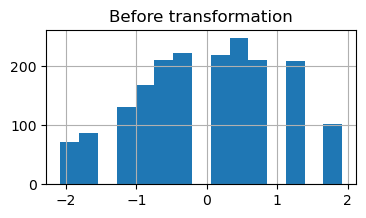

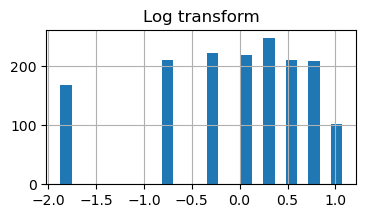

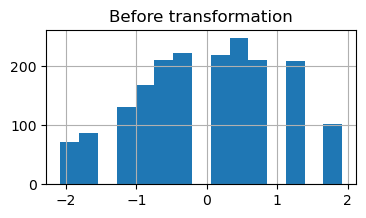

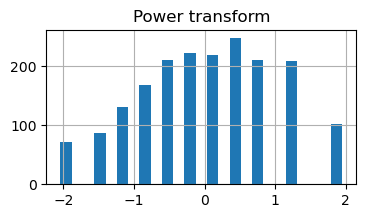

In [41]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

old_skew = encoded_df.skew().sort_values(ascending=False)

ss_data = encoded_df['SS']
pt = PowerTransformer(method='yeo-johnson', standardize=False)
def log_transform(x):
    return np.log(x+1)
transformer = FunctionTransformer(log_transform)

def transform(data, transformer, name):
    df = pd.DataFrame(data)
    transformed = transformer.fit_transform(df)
    df.hist(bins=15, figsize=(4,2))
    plt.title(label="Before transformation")
    transformed = pd.DataFrame(transformed, columns=df.columns)
    transformed.hist(bins=25, figsize=(4,2))
    plt.title(label=name)

transform(data=ss_data,transformer=transformer, name='Log transform')
transform(data=ss_data,transformer=pt, name='Power transform')



Oh okay, it seems like the transformation didn't give any reasonable result. Let's stay with the data we have. Let's take a look at the Implusive column. We believe that the results will be the same.

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


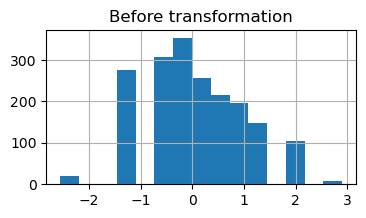

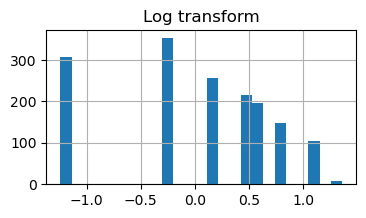

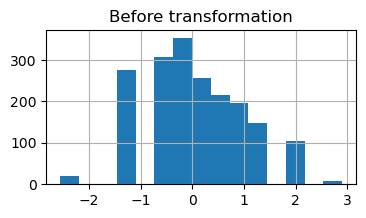

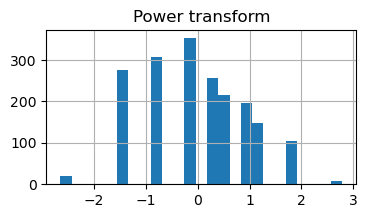

In [42]:
impulsive_data = encoded_df['Impulsive']

transform(data=impulsive_data, transformer=transformer, name='Log transform')
transform(data=impulsive_data, transformer=pt, name='Power transform')


That doesn't look good. We will keep the data as it is. Now let's move to scaling the data. We will use the Standard scaler as we want to preserve the normal distribution of the data. 

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,-0.679435,1.943848,1.441121,0.762842,-0.142741,-0.752913,-0.221197
1,-0.468029,0.807218,-0.850379,-1.625666,-1.016636,-1.453411,0.419536
2,-0.148987,-0.808426,-0.019129,0.591826,0.586726,-1.453411,-1.223036
3,0.736985,-1.637866,-0.453265,-0.302804,1.309747,-0.235174,-0.221197
4,-0.679435,-0.301268,-1.561014,2.045171,1.635314,-1.453411,-1.604778


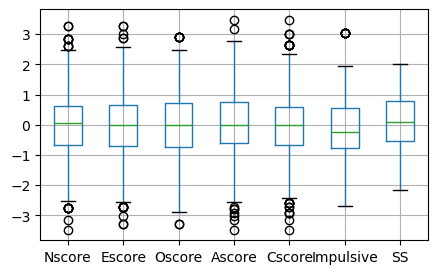

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continous_columns = ["Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS"]
to_scale = encoded_df[continous_columns]
scaled_data = scaler.fit_transform(to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=continous_columns)
scaled_df.boxplot(figsize=(5,3))
scaled_df.head()

Hmm that didn't change much, it could possibly be because the data was already scaled which would seem reasonable based on our previous observations. But to be sure that our model will perform good, we will keep scaled data.

In [44]:
scaled_encoded_df = encoded_df.copy()
scaled_encoded_df[continous_columns] = scaled_df
scaled_encoded_df.head()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+,Gender_F,Gender_M,Education_basic,Education_fairly,Education_higher,Country_Australia,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA,Amphet_0,Amphet_1,Amyl_0,Amyl_1,Benzos_0,Benzos_1,Cannabis_0,Cannabis_1,Coke_0,Coke_1,Ecstasy_0,Ecstasy_1,Heroin_0,Heroin_1,Ketamine_0,Ketamine_1,Legalh_0,Legalh_1,LSD_0,LSD_1,Meth_0,Meth_1,Mushrooms_0,Mushrooms_1,Nicotine_0,Nicotine_1
0,-0.679435,1.943848,1.441121,0.762842,-0.142741,-0.752913,-0.221197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,-0.468029,0.807218,-0.850379,-1.625666,-1.016636,-1.453411,0.419536,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.148987,-0.808426,-0.019129,0.591826,0.586726,-1.453411,-1.223036,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.736985,-1.637866,-0.453265,-0.302804,1.309747,-0.235174,-0.221197,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.679435,-0.301268,-1.561014,2.045171,1.635314,-1.453411,-1.604778,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


We couldn't see a correlation matrix previously as we had categorical values. Now that we have encoded them, let's have a look at the matrix!

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

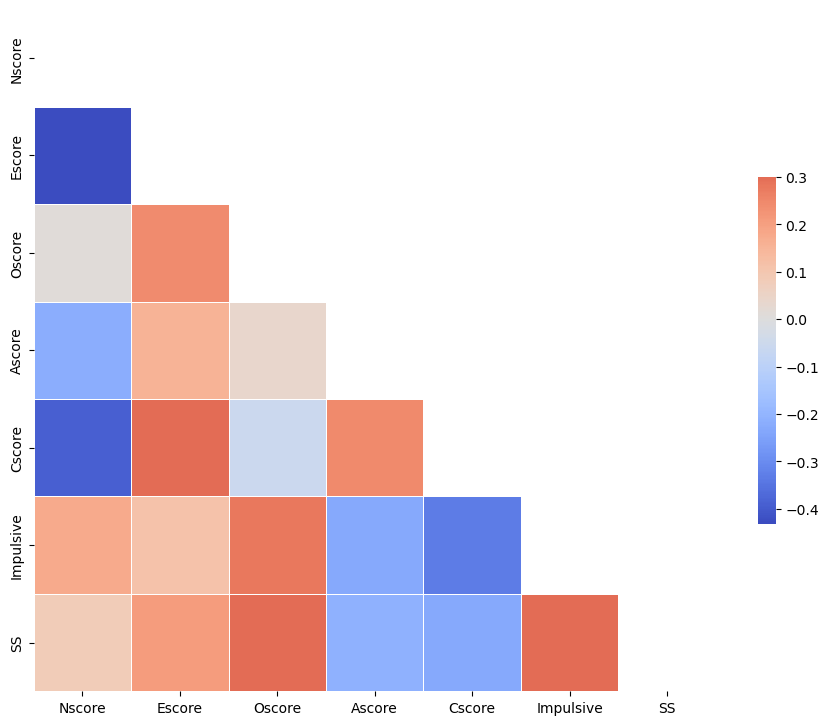

In [45]:
import seaborn as sns
conitnous_df = scaled_encoded_df[continous_columns]
corr = conitnous_df.corr()
# plt.figure(figsize=(6,6))
# sns.heatmap(conitnous_df_corr , annot=True, cmap='coolwarm')
# plt.show()
#I cannot plot it as there is someth

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# My heatmap cannot anotate numbers as there is something wrong with matplotlib: 
# https://stackoverflow.com/questions/56942670/first-and-last-row-cut-in-half-of-heatmap-plot

I will make some more comments about the correlation matrix later. Now that we have 51 features, it's pretty unreadable so my approach would be to divide it into smaller correlation matrices. Like personality traits with user of some drug, or non users so on.

Okay now let's move to Prinicipal Component Analysis! We think it would be nice to reduce the dimensions of our dataset to make the model work faster.

In [70]:
import mglearn
from sklearn.decomposition import PCA

for_pca_df = scaled_encoded_df.copy()

labels_columns= ['Amphet_0',
       'Amphet_1', 'Amyl_0', 'Amyl_1', 'Benzos_0', 'Benzos_1', 'Cannabis_0',
       'Cannabis_1', 'Coke_0', 'Coke_1', 'Ecstasy_0', 'Ecstasy_1', 'Heroin_0',
       'Heroin_1', 'Ketamine_0', 'Ketamine_1', 'Legalh_0', 'Legalh_1', 'LSD_0',
       'LSD_1', 'Meth_0', 'Meth_1', 'Mushrooms_0', 'Mushrooms_1', 'Nicotine_0',
       'Nicotine_1']
labels = for_pca_df[labels_columns]
X_scaled = for_pca_df.drop(columns=labels_columns)

pca = PCA(n_components = 10)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (1884, 25)
Reduced shape: (1884, 10)


In [48]:
import numpy
print(f"The ratio of 10 components: {[round(x, 4) for x in pca.explained_variance_ratio_]}")
print(f"This is how much information is explained in those ten components: {round(numpy.sum(pca.explained_variance_ratio_),4)}")

The ratio of 10 components: [0.2564, 0.1936, 0.0964, 0.074, 0.0726, 0.0545, 0.0456, 0.0372, 0.036, 0.0264]
This is how much information is explained in those ten components: 0.8928


WOW, 89% of variance explained in 10 components, that's amazing! 

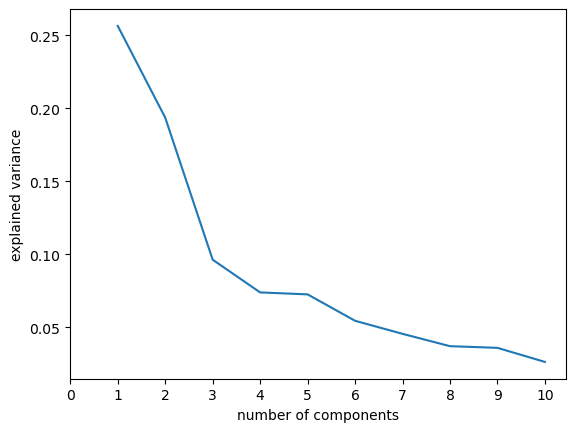

In [49]:
plt.plot(list(range(1, 1 + len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.xticks(np.arange(0, 1 + len(pca.explained_variance_ratio_), step=1))
plt.show()

Hmmm, interesting, that doesn't particularly look like an elbow. However, we can still see that the first 3 components are vertical thus they explain a lot of information. The next two components are more horizontal but they still explain around 7% of the variance so we think that it makes sense to keep them. Let's try PCA with 5 components.

In [65]:
import numpy
def pcaN(n):
    pca5 = PCA(n_components = n)
    pca5.fit(X_scaled)
    X_pca5 = pca5.transform(X_scaled)
    print(f"The ratio of {n} components: {[round(x, 4) for x in pca5.explained_variance_ratio_]}")
    print(f"This is how much information is explained in those {n} components: {round(numpy.sum(pca5.explained_variance_ratio_),4)}")

pcaN(5)

The ratio of 5 components: [0.2564, 0.1936, 0.0964, 0.074, 0.0726]
This is how much information is explained in those 5 components: 0.693


In [66]:
pcaN(8)

The ratio of 8 components: [0.2564, 0.1936, 0.0964, 0.074, 0.0726, 0.0545, 0.0456, 0.0372]
This is how much information is explained in those 8 components: 0.8304


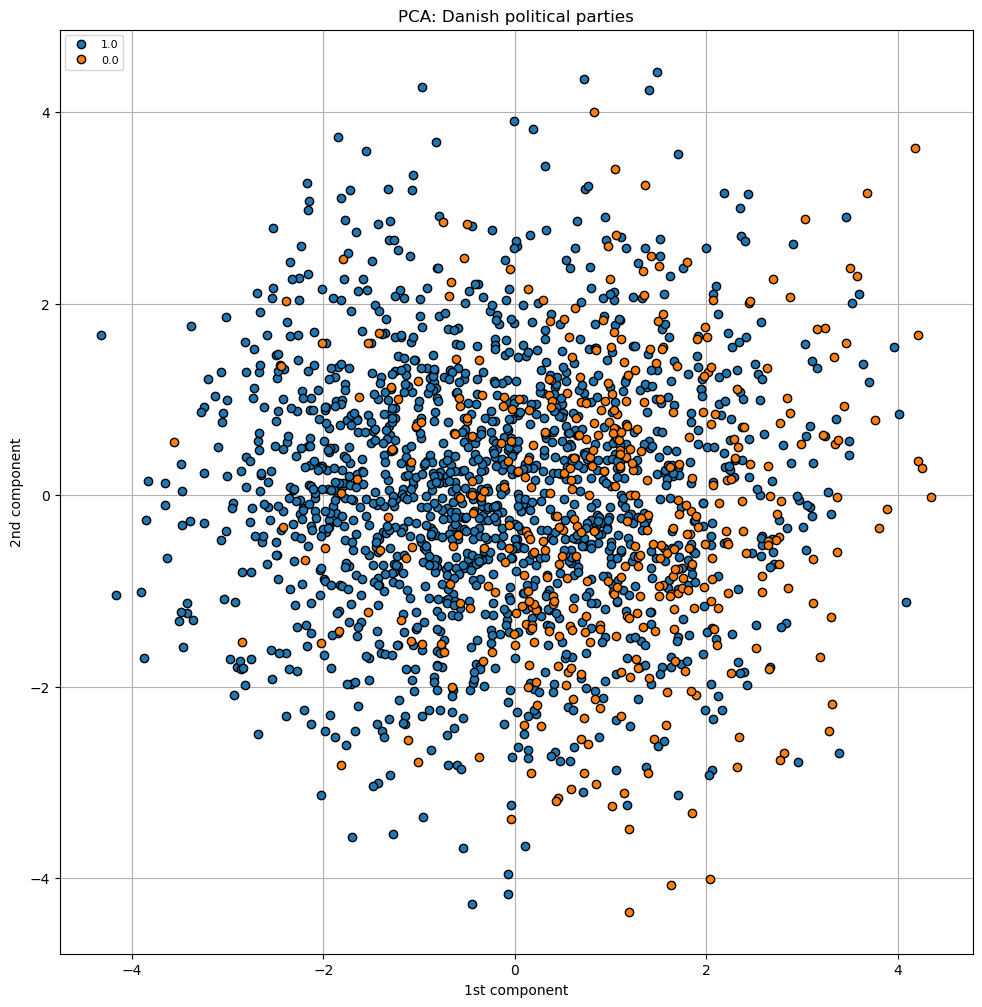

In [74]:
plt.figure(figsize=(15, 12))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], labels['Coke_1'], s=6, markers='o')
plt.legend(labels['Heroin_0'].unique(), loc="upper left", fontsize=8)  # Smaller legend font size
plt.gca().set_aspect("equal")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.title("PCA: Danish political parties")
plt.grid(True)

wirte something that it's cool that there some more dots on the right than on the left bla bla, that's actually the same graph for every substance
so maybe plot is not so nice here idk 


In [71]:
components = pca.components_
explained_variance = pca.explained_variance_
feature_names = X_scaled.columns

# Print the contribution of each feature to the components
important_features = []
num_features = X_scaled.shape[1]
for i in range(2):
    print(f"Principal Component {i+1}:")
    component_features = [(feature_names[j], components[i][j]) for j in range(num_features)]
    component_features.sort(key=lambda x: abs(x[1]), reverse=True)
    top_5_features = component_features[:5]
    important_features.append(top_5_features)
    for feature, coefficient in top_5_features:
        print(f"{feature}: {coefficient}")

Principal Component 1:
Impulsive: 0.4953093665127696
SS: 0.49035684615730174
Cscore: -0.4027430202861959
Ascore: -0.30019294225158905
Oscore: 0.2928103315890186
Principal Component 2:
Escore: -0.6081594228821792
Nscore: 0.45123960836067506
Oscore: -0.3888645332091066
Cscore: -0.31824740423416337
SS: -0.30575141377885257


cool, like impulsiveness matters duh